# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "References/Assignments_06-Python-APIs_output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
Url= "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
query_url = f"{Url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
temp_max =[]
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
new_city = []
#Loop through the list of cities and perfomra  request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        new_city.append(city)
        print(city)
    except:
        print("city not found skipping..")



saldanha
cabo san lucas
arraial do cabo
punta arenas
ngunguru
kaitangata
qaanaaq
albany
jamestown
san quintin
khatanga
pirovskoye
city not found skipping..
zhuhai
tura
tuktoyaktuk
savalou
vaini
city not found skipping..
rikitea
castro
avarua
nikolskoye
mataura
cidreira
vila franca do campo
tonantins
qostanay
hilo
hithadhoo
new norfolk
lasa
ushuaia
severo-kurilsk
port alfred
fairlie
cangucu
tiksi
katsuura
bambous virieux
hermanus
port elizabeth
verkhnevilyuysk
cape town
odienne
bluff
concordia
gladstone
ancud
nador
city not found skipping..
port-cartier
mahebourg
mascote
city not found skipping..
carnarvon
guerrero negro
jacareacanga
maldonado
kapaa
dunedin
faya
city not found skipping..
san cristobal
waingapu
lufilufi
saskylakh
airai
atuona
bengkulu
lompoc
baykit
bredasdorp
torbay
city not found skipping..
city not found skipping..
port blair
duldurga
hobart
clyde river
puerto ayora
tomohon
butaritari
badamdar
city not found skipping..
yalvac
la ronge
ordu
ormara
lorengau
hofn
san juan

### Convert Raw Data to DataFrame
* Display the DataFrame

In [20]:
weather_dict = {"city": new_city,
"latitude": lat,
"Longitude": lng,
"Temperature Max": temp_max,
"Humidity": Humidity,
"Cloudiness": Cloudiness,
"Wind Speed": Wind_Speed,
"Country": Country}

Weather_data = pd.DataFrame(weather_dict)
Weather_data.head()

,city,latitude,Longitude,Temperature Max,Humidity,Cloudiness,Wind Speed,Country
0,saldanha,-33.0117,17.9442,14.00,77,78,2.06,ZA
1,cabo san lucas,22.8909,-109.9124,29.00,47,40,3.60,MX
2,arraial do cabo,-22.9661,-42.0278,23.00,83,0,8.23,BR
3,punta arenas,-53.1500,-70.9167,8.00,87,75,2.06,CL
4,ngunguru,-35.6167,174.5000,19.44,79,1,2.24,NZ


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#  Get the indices of cities that have humidity over 100%.
index_over = Weather_data.index[Weather_data['Humidity']>=100]
str(index_over)

"Int64Index([72, 79, 188, 215, 271, 272, 277, 292, 328, 339, 405, 433, 442,\n            449],\n           dtype='int64')"

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Weather_data.drop(index=index_over, inplace=False)
clean_city_data.head()

,city,latitude,Longitude,Temperature Max,Humidity,Cloudiness,Wind Speed,Country
0,saldanha,-33.0117,17.9442,14.00,77,78,2.06,ZA
1,cabo san lucas,22.8909,-109.9124,29.00,47,40,3.60,MX
2,arraial do cabo,-22.9661,-42.0278,23.00,83,0,8.23,BR
3,punta arenas,-53.1500,-70.9167,8.00,87,75,2.06,CL
4,ngunguru,-35.6167,174.5000,19.44,79,1,2.24,NZ


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

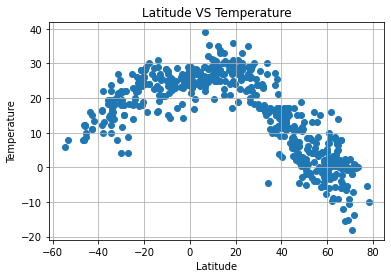

In [36]:
plt.scatter(clean_city_data['latitude'], clean_city_data['Temperature Max'])
plt.title("Latitude VS Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TempVSlat.png")

plt.show()

## Latitude vs. Humidity Plot

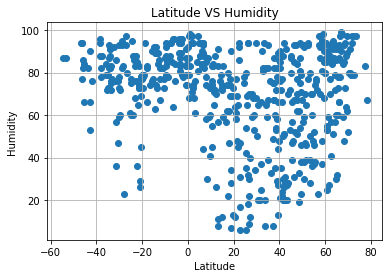

In [46]:
plt.scatter(clean_city_data['latitude'], clean_city_data['Humidity'])
plt.title("Latitude VS Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TempVSHum.png")

plt.show()

## Latitude vs. Cloudiness Plot

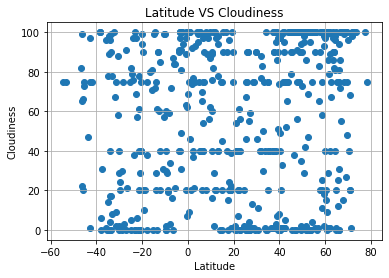

In [47]:
plt.scatter(clean_city_data['latitude'], clean_city_data['Cloudiness'])
plt.title("Latitude VS Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TempVSCloud.png")

plt.show()

## Latitude vs. Wind Speed Plot

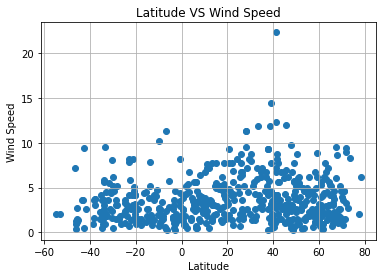

In [48]:
plt.scatter(clean_city_data['latitude'], clean_city_data['Wind Speed'])
plt.title("Latitude VS Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TempVSWind.png")

plt.show()

## Linear Regression

In [67]:
#Create Northern Hemisphere Dataframe
north_index = clean_city_data.index[clean_city_data['latitude']>=0]
str(north_index)


"Int64Index([  1,   6,   7,   8,   9,  10,  11,  12,  13,  14,\n            ...\n            540, 541, 542, 544, 547, 548, 549, 550, 551, 552],\n           dtype='int64', length=376)"

In [68]:
Northern_hemi = clean_city_data.drop(index=north_index, inplace=False)
Northern_hemi.head()

,city,latitude,Longitude,Temperature Max,Humidity,Cloudiness,Wind Speed,Country
0,saldanha,-33.0117,17.9442,14.00,77,78,2.06,ZA
2,arraial do cabo,-22.9661,-42.0278,23.00,83,0,8.23,BR
3,punta arenas,-53.1500,-70.9167,8.00,87,75,2.06,CL
4,ngunguru,-35.6167,174.5000,19.44,79,1,2.24,NZ
5,kaitangata,-46.2817,169.8464,12.22,77,22,0.89,NZ


In [69]:
#Create Southern Hemisphere Dataframe
south_index = clean_city_data.index[clean_city_data['latitude']<0]
str(south_index)


"Int64Index([  0,   2,   3,   4,   5,  16,  17,  18,  19,  21,\n            ...\n            515, 516, 524, 528, 529, 533, 539, 543, 545, 546],\n           dtype='int64', length=163)"

In [71]:
Southern_hemi = clean_city_data.drop(index=south_index, inplace=False)
Southern_hemi.head()

,city,latitude,Longitude,Temperature Max,Humidity,Cloudiness,Wind Speed,Country
1,cabo san lucas,22.8909,-109.9124,29.00,47,40,3.60,MX
6,qaanaaq,77.4840,-69.3632,-5.40,83,100,2.07,GL
7,albany,42.6001,-73.9662,14.44,20,5,3.58,US
8,jamestown,42.0970,-79.2353,13.00,30,1,7.72,US
9,san quintin,30.4833,-115.9500,17.11,65,11,8.00,MX


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

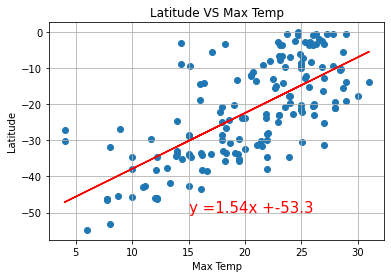

In [55]:
x_values = Northern_hemi['Temperature Max']
y_values = Northern_hemi['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (15, -50), fontsize=15, color='red')
plt.title("Latitude VS Max Temp")
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.grid(True)
plt.savefig("Northern_temp_reg.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

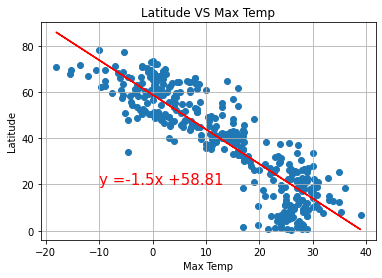

In [73]:
x_values = Southern_hemi['Temperature Max']
y_values = Southern_hemi['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-10, 20), fontsize=15, color='red')
plt.title("Latitude VS Max Temp")
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.grid(True)
plt.savefig("Southern_temp_reg.png")

plt.show()

##Latitude Analysis: the linear regress are perfectly opposite 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

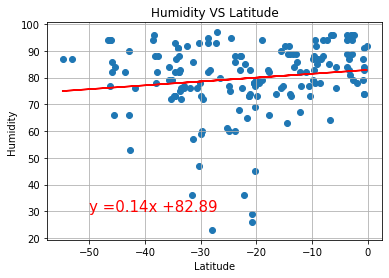

In [80]:
x_values = Northern_hemi['latitude']
y_values = Northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 30), fontsize=15, color='red')
plt.title("Humidity VS Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Northern_humid_reg.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

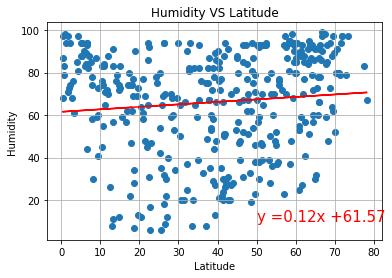

In [81]:
x_values = Southern_hemi['latitude']
y_values = Southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (50, 10), fontsize=15, color='red')
plt.title("Humidity VS Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Southern_humid_reg.png")

plt.show()

## Humidity Analysis: there is no strong correlation between humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

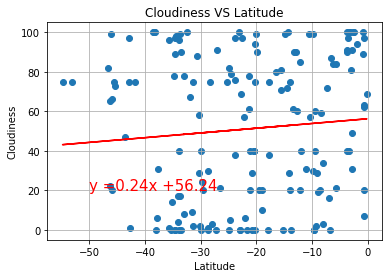

In [82]:
x_values = Northern_hemi['latitude']
y_values = Northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 20), fontsize=15, color='red')
plt.title("Cloudiness VS Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Northern_cloud_reg.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

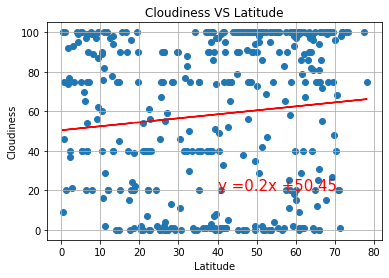

In [86]:
x_values = Southern_hemi['latitude']
y_values = Southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (40, 20), fontsize=15, color='red')
plt.title("Cloudiness VS Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Southern_cloud_reg.png")

plt.show()

## Cloudiness Analysis: There is also no strong correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

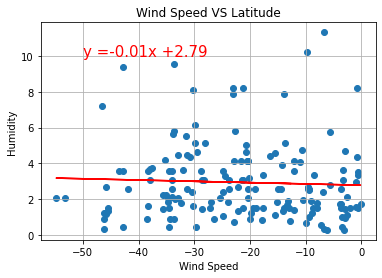

In [83]:
x_values = Northern_hemi['latitude']
y_values = Northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 10), fontsize=15, color='red')
plt.title("Wind Speed VS Latitude")
plt.ylabel("Humidity")
plt.xlabel("Wind Speed")
plt.grid(True)
plt.savefig("Northern_wind_reg.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

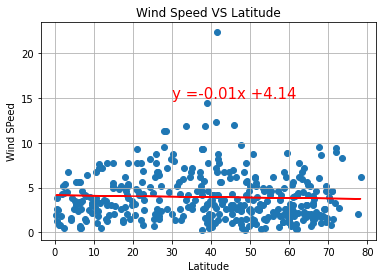

In [89]:
x_values = Southern_hemi['latitude']
y_values = Southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (30, 15), fontsize=15, color='red')
plt.title("Wind Speed VS Latitude")
plt.ylabel("Wind SPeed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Southern_wind_reg.png")

plt.show()

##Wind Speed Analysis: Seems to be lower wind speeds in Southern Hemisphere than the Northern Hemisphere